In [1]:
import os
import tarfile
import urllib.request
import pandas as pd

# URL correta do dataset
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):   #baixa e extrai os dados
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()



In [2]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)   #le os dados e transforma eles em dataframes
fetch_housing_data()
housing = load_housing_data()

In [3]:
print(housing.head()) #mostra as primeiras 5 linhas do dataframe e as colunas

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [4]:
print(housing.info()) #mostra os tipos de dados presentes no dataframe, e é possivel perceber que na coluna total_bedrooms existem valores nulos e tambem que a ocean proximity é categórica (OBJECTS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [5]:
housing.describe() #apresenta alguns dados estatisticos do df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing["ocean_proximity"].value_counts() #mostra os valores objects no df

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

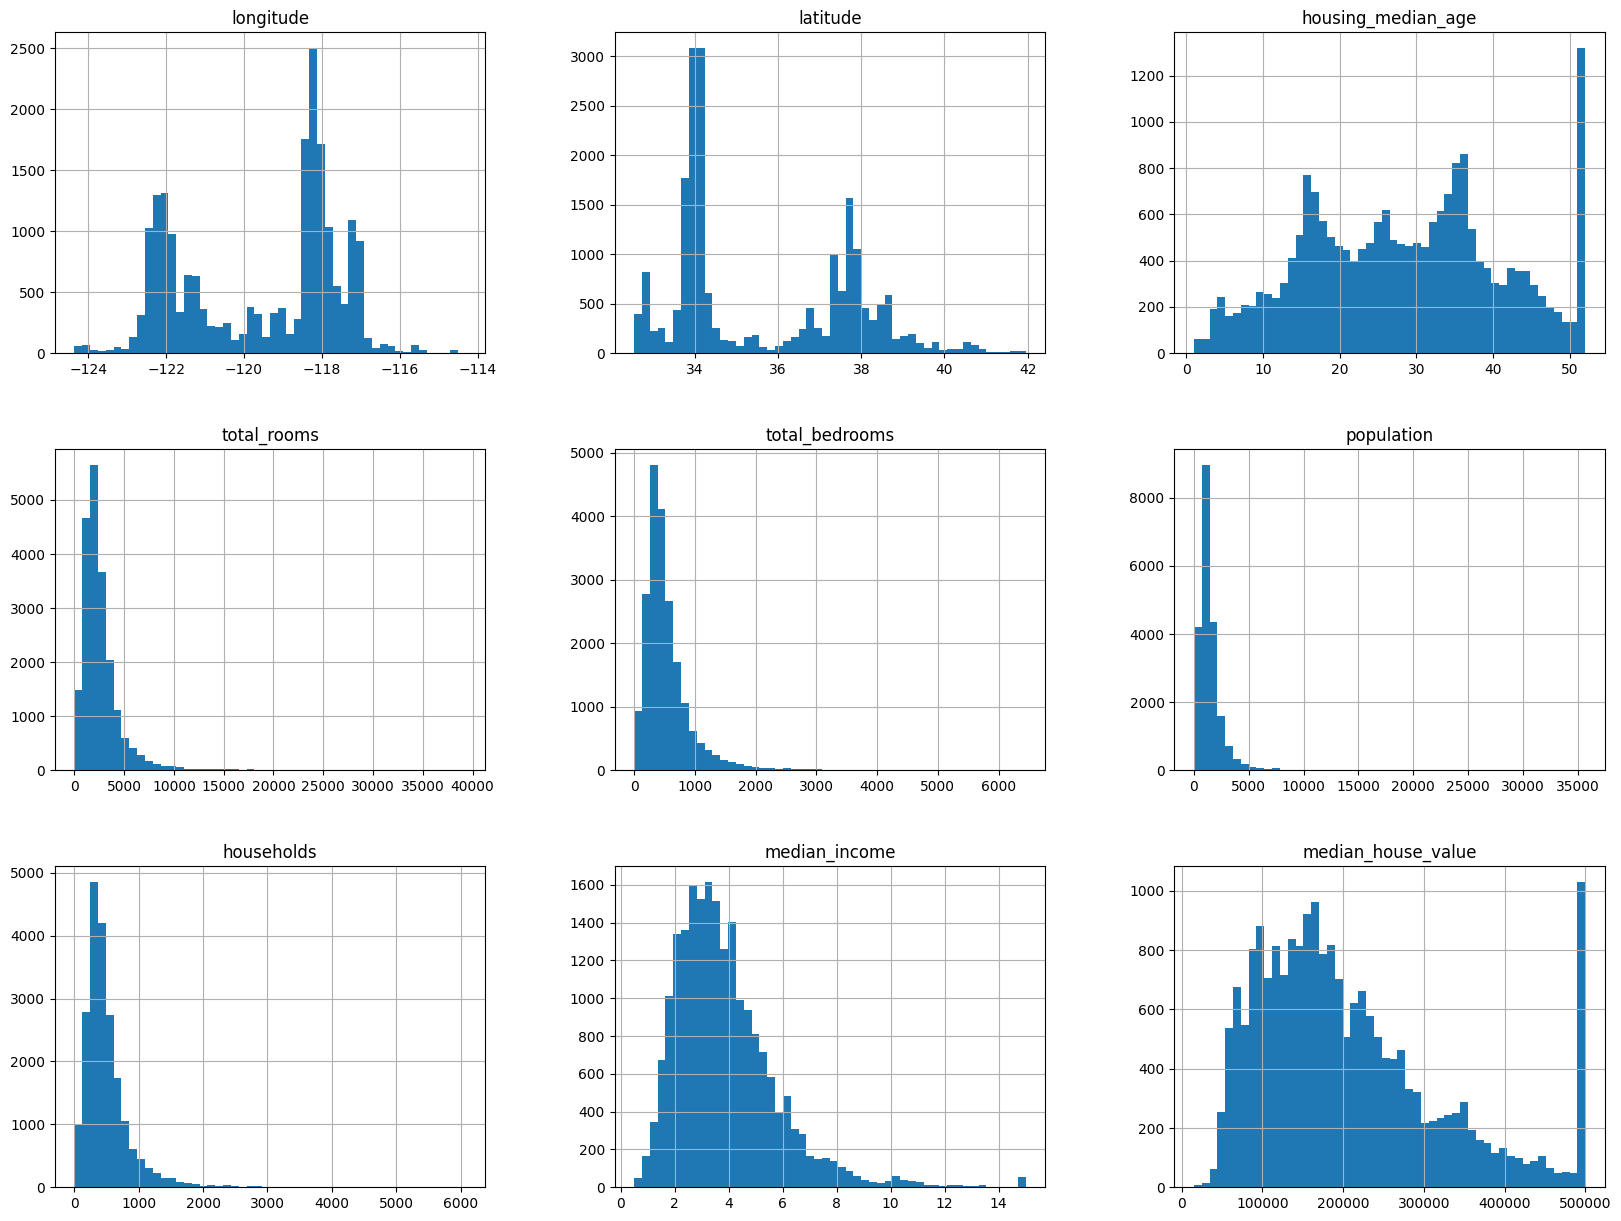

In [7]:
import matplotlib.pyplot as plt  
housing.hist(bins=50, figsize =(20,15)) # o hist mostra um historiograma dos dados 
plt.show() #uma coisa a ser observada é a long tail de alguns graficos, ou seja , pode dificultar a deteccao de padroes por alguns alg de ml

In [8]:
from sklearn.model_selection import train_test_split 
X = housing.drop(columns=["median_house_value"])
Y = housing["median_house_value"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 
#print(X.head())
print(Y.head())

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


<Axes: >

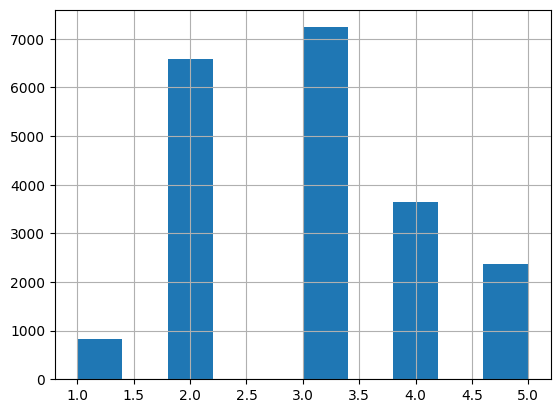

In [9]:
import numpy as np


housing["income_cat"] = pd.cut(    # crio categorias com base no median income das pessoas, tnetnado garantir a representacao das diversas categorias de renda no df
                                   # foi notado que os median income importava muito no preço das casas, ou seja, ele deve ser bem aproveitado e manejado nos conjuntos de teste e treino
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

housing["income_cat"].hist()


In [10]:
# Importa a ferramenta para divisão estratificada 
from sklearn.model_selection import StratifiedShuffleSplit 
import pandas as pd
import numpy as np

# Cria o objeto de divisão estratificada
# n_splits=1 → só queremos uma divisão (train/test)
# test_size=0.2 → 20% dos dados vão para teste, 80% para treino
# random_state=42 → fixa a aleatoriedade (para sempre gerar a mesma divisão)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Gera os índices de treino e teste preservando a proporção de "income_cat"
# train_index → lista de índices das linhas que vão para o treino
# test_index  → lista de índices das linhas que vão para o teste
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]   # cria DataFrame de treino
    strat_test_set  = housing.loc[test_index]    # cria DataFrame de teste

# ---- Conferindo distribuições ----

# Proporção de cada categoria de renda no TREINO
# value_counts() → conta quantos valores tem em cada categoria
# len(strat_train_set) → número total de amostras do treino
# A divisão gera a proporção (ex: 0.35 significa 35% do treino está nessa categoria)
train_proportions = strat_train_set["income_cat"].value_counts() / len(strat_train_set)

# Proporção de cada categoria de renda no TESTE
# Mesma lógica, mas usando o conjunto de teste
test_proportions = strat_test_set["income_cat"].value_counts() / len(strat_test_set)

# Proporção de cada categoria no DATASET ORIGINAL
# Isso serve para comparar se treino e teste preservaram a distribuição real
overall_proportions = housing["income_cat"].value_counts() / len(housing)

# ---- Comparando lado a lado ----

# Cria uma tabela (DataFrame) com as proporções em cada conjunto
comparison = pd.DataFrame({
    "Original": overall_proportions,
    "Treino": train_proportions,
    "Teste": test_proportions
})

# Mostra a tabela comparativa
print(comparison)



            Original    Treino     Teste
income_cat                              
3           0.350581  0.350594  0.350533
2           0.318847  0.318859  0.318798
4           0.176308  0.176296  0.176357
5           0.114438  0.114462  0.114341
1           0.039826  0.039789  0.039971


In [11]:
# Remove a coluna "income_cat" do treino e do teste
strat_train_set = strat_train_set.drop("income_cat", axis=1) # AXIS 1 PRA mostra que é a calunae nao uma linha
strat_test_set  = strat_test_set.drop("income_cat", axis=1)

<Axes: xlabel='longitude', ylabel='latitude'>

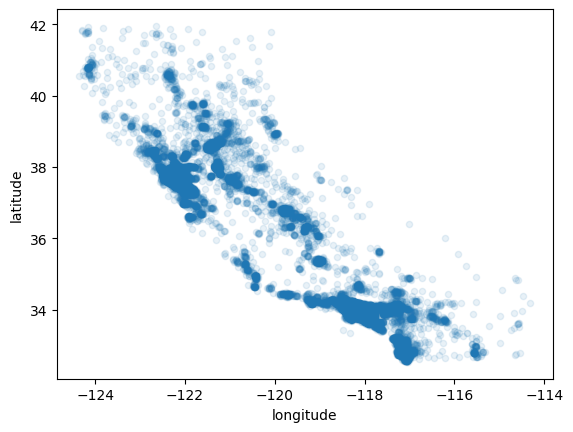

In [12]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.1)

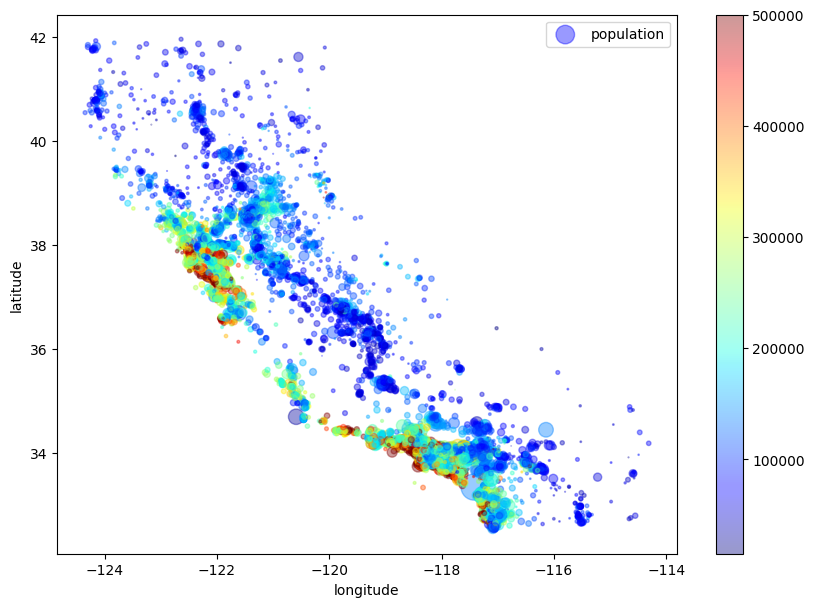

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c=housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
            

In [14]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=True) 
#calcula as correlacoes entre a variacao dos parametros e a influencia no parametro desejado, por exemplo , o median_income tem alta importancia




latitude             -0.142673
longitude            -0.047466
population           -0.026882
total_bedrooms        0.047781
households            0.064590
housing_median_age    0.114146
total_rooms           0.135140
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

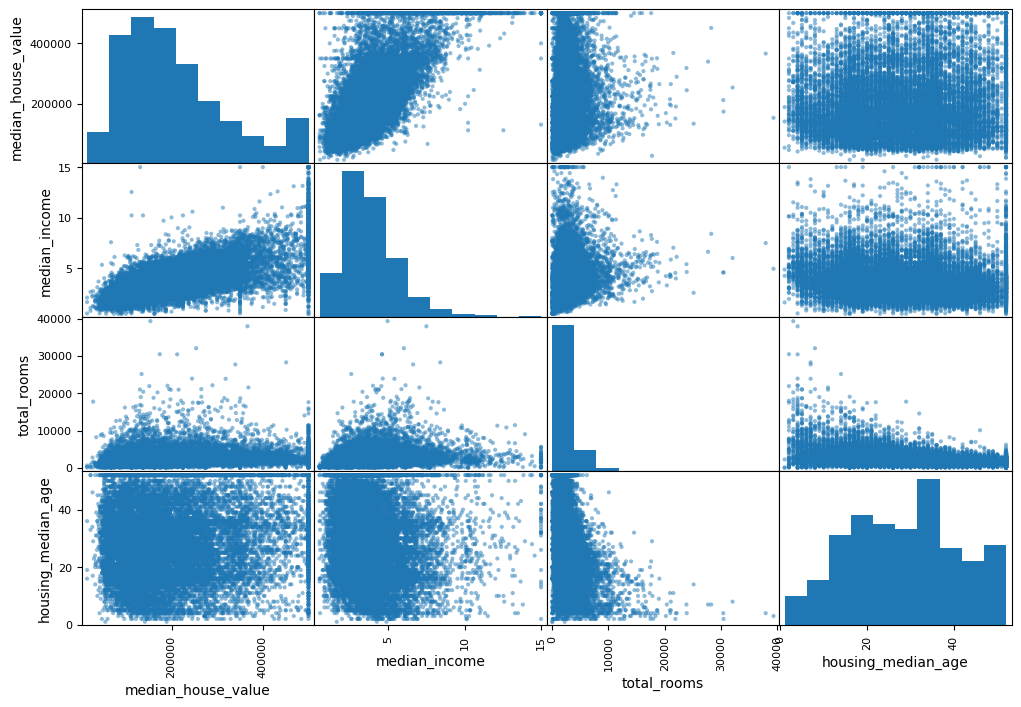

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize= (12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

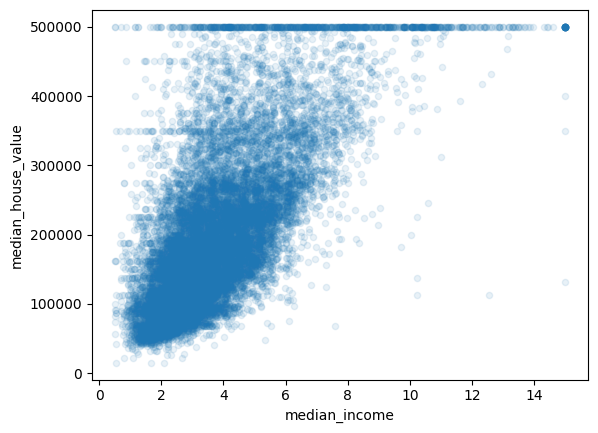

In [16]:
housing.plot(kind="scatter", x= "median_income", y = "median_house_value",alpha = 0.1)

In [17]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing['bedrooms_per_rooms'] = housing["total_bedrooms"]/ housing["total_rooms"]
housing["population_per_household"] = housing["population"]/ housing['households']
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_rooms,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [ ]:
housing = strat_test_set.drop("median_house_value", axis = 1)
housing_labels = strat_test_set["median_house_value"].copy()
median = housing['total_bedrooms'].median()
housing["total_bedrooms"].fillna(median,inplace = True)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_num)
imputer.statistics_
housing_num.median().values
X = imputer.transform(housing_num)



C:\Users\joao\AppData\Local\Temp\ipykernel_12280\1282677260.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median,inplace = True)


In [39]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# índices das colunas (dependem do seu dataset)
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # hiperparâmetro opcional
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nada para ajustar
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),      # pipeline para padronizar e automatizar as transoformacoes dos dados
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [45]:
from sklearn.compose import ColumnTransformer 
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),        # aplica o pipeline numérico
    ("cat", OneHotEncoder(), cat_attribs)      # aplica OneHot nas categorias
])

housing_prepared = full_pipeline.fit_transform(housing)